IMPORTING LIBRARIES

In [132]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

CONVERTING IMAGE INTO GRAYSCALE

Text(0.5, 1.0, 'Grayscale image')

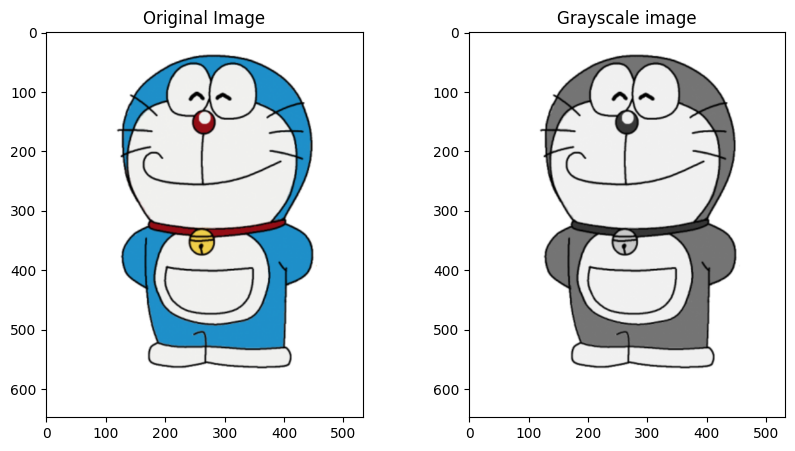

In [133]:
image = cv2.imread("C:/Users/parth/Desktop/neela_bilota.png")
actual_image  =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

_ , var = plt.subplots(1,2,figsize=(10,5)) #subplot of 1 row and 2 columns

#displaying images
var[0].imshow(actual_image)
var[0].set_title('Original Image')

var[1].imshow(gray_image,cmap = 'gray')
var[1].set_title('Grayscale image')

BLURRING THE IMAGE

Text(0.5, 1.0, 'Blurred image')

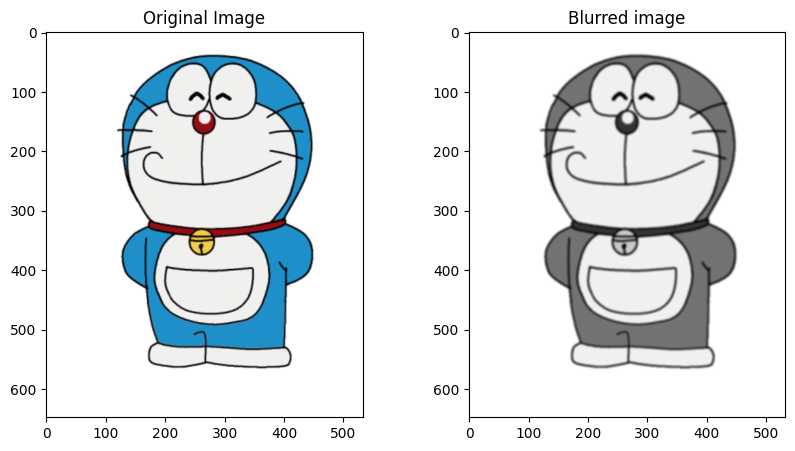

In [146]:
blurred_image = cv2.GaussianBlur(gray_image,(5,5),2.2)

_ , var = plt.subplots(1,2,figsize=(10,5)) 

var[0].imshow(actual_image)
var[0].set_title('Original Image')

var[1].imshow(blurred_image,cmap = 'gray')
var[1].set_title('Blurred image')

SOBEL EDGE DETECTION

Text(0.5, 1.0, 'Sobel')

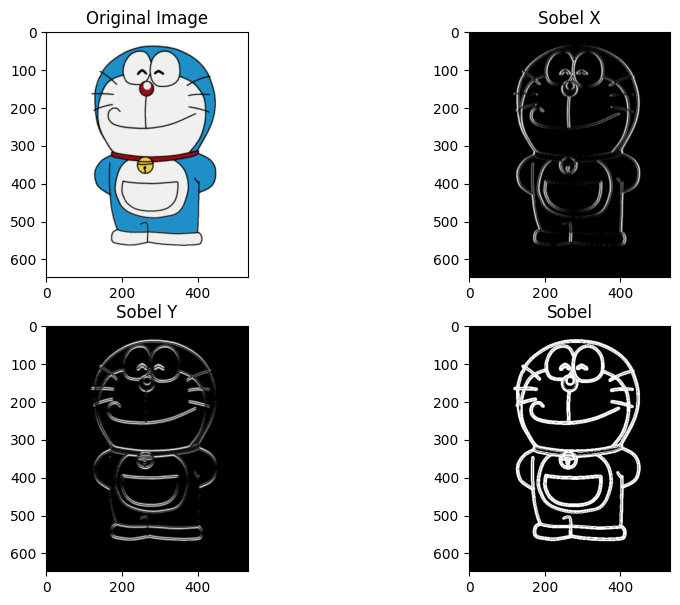

In [147]:
sobel_x = cv2.Sobel(blurred_image  , cv2.CV_64F , 1 ,0 ,ksize = 3)
sobel_y = cv2.Sobel(blurred_image , cv2.CV_64F , 0 ,1 ,ksize=3)

sobel_x = np.absolute(sobel_x)
sobel_y = np.absolute(sobel_y)

sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)


_, edges = cv2.threshold(sobel_magnitude, 50, 255, cv2.THRESH_BINARY)

_, axs = plt.subplots(2, 2, figsize=(10, 7))

axs[0][0].imshow(actual_image, )
axs[0][0].set_title('Original Image')

axs[0][1].imshow(sobel_x, cmap='gray')
axs[0][1].set_title('Sobel X')

axs[1][0].imshow(sobel_y, cmap='gray')
axs[1][0].set_title('Sobel Y')

axs[1][1].imshow(edges, cmap='gray')
axs[1][1].set_title('Sobel')




SCHARR EDGE DETECTION

Text(0.5, 1.0, 'Scharr')

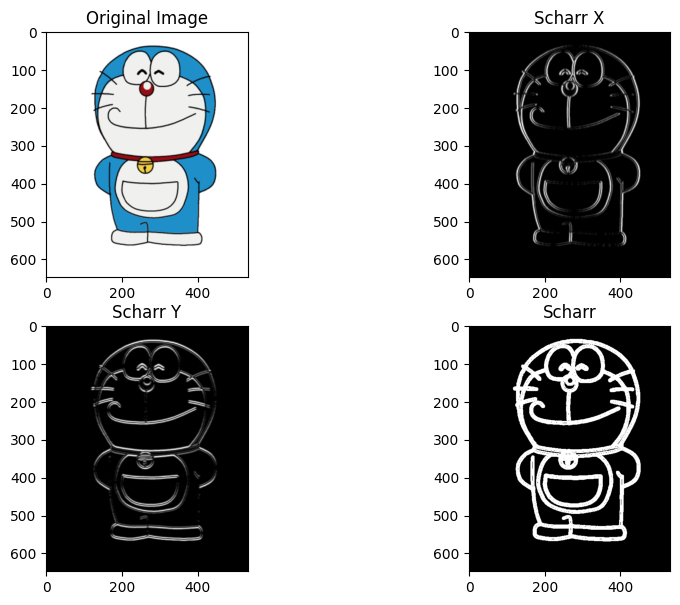

In [148]:
scharr_x = cv2.Scharr(blurred_image  , cv2.CV_64F , 1 ,0 )
scharr_y = cv2.Scharr(blurred_image , cv2.CV_64F , 0 ,1 )

scharr_x = np.absolute(scharr_x)
scharr_y = np.absolute(scharr_y)

scharr_magnitude = np.sqrt(scharr_x**2 + scharr_y**2)

_, edges = cv2.threshold(scharr_magnitude, 50, 255, cv2.THRESH_BINARY)



_, axs = plt.subplots(2, 2, figsize=(10, 7))

axs[0][0].imshow(actual_image, )
axs[0][0].set_title('Original Image')

axs[0][1].imshow(scharr_x, cmap='gray')
axs[0][1].set_title('Scharr X')

axs[1][0].imshow(scharr_y, cmap='gray')
axs[1][0].set_title('Scharr Y')

axs[1][1].imshow(edges, cmap='gray')
axs[1][1].set_title('Scharr')


LAPLACIAN EDGE DETECTION

Text(0.5, 1.0, 'Laplacian Edge Detection')

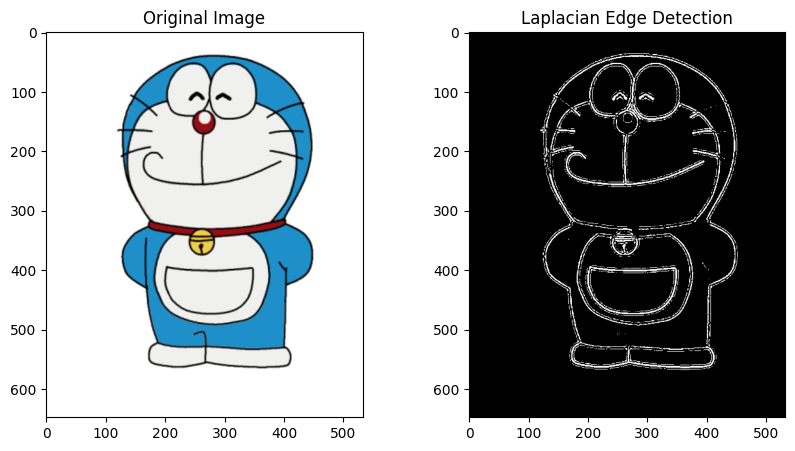

In [151]:
laplacian_image = cv2.Laplacian(blurred_image, cv2.CV_64F)
laplacian_image = np.uint8(np.absolute(laplacian_image))


_, lap_thresh = cv2.threshold(laplacian_image, 19, 255, cv2.THRESH_BINARY)
_ , var = plt.subplots(1,2,figsize=(10,5)) 

var[0].imshow(actual_image)
var[0].set_title('Original Image')

var[1].imshow(lap_thresh,cmap = 'gray')
var[1].set_title('Laplacian Edge Detection')

CANNY EDGE DETECTION

Text(0.5, 1.0, 'Canny Edge Detection')

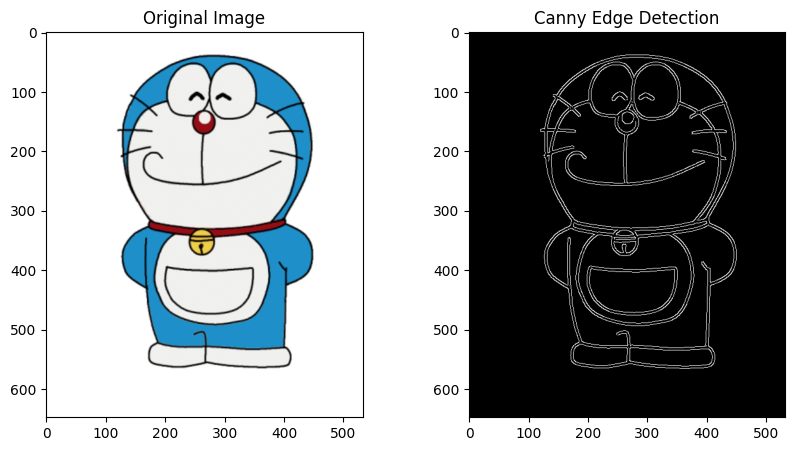

In [150]:
variable = cv2.Canny(blurred_image,threshold1=20,threshold2=50)



_ , var = plt.subplots(1,2,figsize=(10,5))
var[0].imshow(actual_image)
var[0].set_title('Original Image')

var[1].imshow(variable,cmap='gray')
var[1].set_title('Canny Edge Detection')

